# Rahul Kumar Goyal (rxg170030)
# Varun Kumar Manohara Selvan (vxm170030)

Loading the required libraries and functions

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings; warnings.simplefilter('ignore')

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

Using TensorFlow backend.


Loading the data

In [2]:
df = pd.read_csv('ENB2012_data.csv')

### Data Transformation

In [3]:
df.columns = ["relative_compactness", "surface_area", "wall_area",
              "roof_area", "overall_height", "orientation", "glazing_area",
             "glazing_area_distribution", "heating_load", "cooling_load"]

In [4]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Converting Orientation and Glazing area distribution to one hot as they are categorical variables

In [5]:
orientation_array = np.array(df["orientation"])
encoded = to_categorical(orientation_array)
encoded_df = pd.DataFrame(encoded)
orientation_encoded_df = encoded_df.drop([0,1], axis = 1)
orientation_encoded_df.columns = ["North", "East", "South", "West"]

glazing_area_disbn_array = np.array(df["glazing_area_distribution"])
encoded = to_categorical(glazing_area_disbn_array)
glazing_area_disbn_encoded_df = pd.DataFrame(encoded)
glazing_area_disbn_encoded_df.columns = ["UnKnownGlaze", "UniformGlaze", "NorthGlaze", "EastGlaze", "SouthGlaze", "WestGlaze"]

In [6]:
new_df = pd.concat([df, orientation_encoded_df, glazing_area_disbn_encoded_df], axis=1)
new_df = new_df.drop(["orientation","glazing_area_distribution"], axis = 1)

In [7]:
new_df.columns

Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'glazing_area', 'heating_load', 'cooling_load',
       'North', 'East', 'South', 'West', 'UnKnownGlaze', 'UniformGlaze',
       'NorthGlaze', 'EastGlaze', 'SouthGlaze', 'WestGlaze'],
      dtype='object')

In [8]:
feature_columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'North', 'East',
       'South', 'West', 'glazing_area', 'UnKnownGlaze',
       'UniformGlaze', 'NorthGlaze', 'EastGlaze', 'SouthGlaze', 'WestGlaze']

In [9]:
new_df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,heating_load,cooling_load,North,East,South,West,UnKnownGlaze,UniformGlaze,NorthGlaze,EastGlaze,SouthGlaze,WestGlaze
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = new_df[feature_columns]
y = df[['heating_load','cooling_load']]
y_heat = df['heating_load']
y_cool = df['cooling_load']

### Regression

Let us calculate heating load and cooling load using various regressors <br>
The R2-score combined for both heating and cooling load will be considered as the metric to evaluate since both are equally important

Split the train and test data and scale them

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear Regression** model

In [12]:
linreg = LinearRegression().fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

R-squared score (training): 0.918
R-squared score (test): 0.883


Linear Regressiong gives a dececnt performance but overfits the training data. Let us run **SVR** and see if we can do any better.<br>
Grid Search was done on SVR but code was not included here as it took a lot of time and to run

In [13]:
print('Linear Kernel')
svr = SVR(kernel = 'linear', epsilon = 0.1, C = 10)
mregsvr = MultiOutputRegressor(svr)
mregsvr.fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(mregsvr.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(mregsvr.score(X_test_scaled, y_test)))

print('\n')
print('RBF Kernel')
svr = SVR(kernel = 'rbf', gamma = 'auto', epsilon = 0.1, C = 100)
mregsvr = MultiOutputRegressor(svr)
mregsvr.fit(X_train_scaled, y_train)
print('R-squared score (training): {:.3f}'
     .format(mregsvr.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(mregsvr.score(X_test_scaled, y_test)))

Linear Kernel
R-squared score (training): 0.910
R-squared score (test): 0.876


RBF Kernel
R-squared score (training): 0.925
R-squared score (test): 0.882


SVR was trained with different values of C, gamma and epsilon and gave results similar to Linear Regression. Let us try **KNN Regressor**.

In [14]:
for num_neighbors in range(2, 10):
    knnreg = KNeighborsRegressor(n_neighbors = num_neighbors)
    mregknn = MultiOutputRegressor(knnreg).fit(X_train_scaled, y_train)
    
    print('R-squared train score for {} neighbors: {:.4f}'
         .format(num_neighbors, mregknn.score(X_train_scaled, y_train)))
    print('R-squared test score for {} neighbors: {:.4f}'
         .format(num_neighbors, mregknn.score(X_test_scaled, y_test)))

R-squared train score for 2 neighbors: 0.9320
R-squared test score for 2 neighbors: 0.8045
R-squared train score for 3 neighbors: 0.9280
R-squared test score for 3 neighbors: 0.8242
R-squared train score for 4 neighbors: 0.9197
R-squared test score for 4 neighbors: 0.8285
R-squared train score for 5 neighbors: 0.9126
R-squared test score for 5 neighbors: 0.8173
R-squared train score for 6 neighbors: 0.9052
R-squared test score for 6 neighbors: 0.8095
R-squared train score for 7 neighbors: 0.8968
R-squared test score for 7 neighbors: 0.8034
R-squared train score for 8 neighbors: 0.8899
R-squared test score for 8 neighbors: 0.7978
R-squared train score for 9 neighbors: 0.8815
R-squared test score for 9 neighbors: 0.7971


KNN is doing good for 5-8 neighbors but same as linear regression, overfitting the train data. Let us try **Decision Tree**

In [15]:
param_grid = {'max_depth':[3,5,6,7,8]}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5).fit(X, y)
print(grid_search.best_estimator_)

dt = DecisionTreeRegressor(max_depth= 6).fit(X_train_scaled, y_train)

print('\n')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


R-squared score (training): 0.988
R-squared score (test): 0.972


Decision Tree is giving good performance. Let us try **bagging and boosting this model**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cool, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_base = DecisionTreeRegressor(max_depth= 6)
dt = AdaBoostRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

dt_base = DecisionTreeRegressor(max_depth= 6)
dt = BaggingRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))



R-squared score (training): 0.982
R-squared score (test): 0.947


R-squared score (training): 0.980
R-squared score (test): 0.955


Grid Search on **Random Forest Regressor** to get best parameters

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {'n_estimators':[200, 300, 500,1000],
             'max_depth':[7, 9, 11, 13],
             'min_samples_split':[5,10,20,40],
             'max_features':[5,7,10,15]}

rf_base = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(rf_base, param_grid=param_grid, cv = 5).fit(X_scaled, y_cool)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

Fitting random forest with best model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=300, max_depth = 9, max_features=15, min_samples_split=10,
                           min_samples_leaf = 1).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(rf.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(rf.score(X_test_scaled, y_test)))

R-squared score (training): 0.988
R-squared score (test): 0.977


Grid Search on **Gradient Boosting Regressor** to get best parameters

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {'n_estimators':[200, 300, 500,1000],
             'max_depth':[7, 9, 11, 13],
             'min_samples_split':[5,10,20,40],
             'max_features':[5,7,10,15]}

gb_base = GradientBoostingRegressor(random_state=1)
grid_search = GridSearchCV(gb_base, param_grid=param_grid, cv = 5).fit(X_scaled, y_cool)
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=15,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=40, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

Training Gradient boosting with best parameters

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_base = GradientBoostingRegressor(n_estimators=1000, max_depth = 7, min_samples_leaf=1,
                                    min_samples_split= 40, max_features=15)
gb = MultiOutputRegressor(gb_base).fit(X_train_scaled, y_train)

print('R-squared score (training): {:.3f}'
     .format(gb.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(gb.score(X_test_scaled, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.992


**Lasso and Ridge regression** on base line linear regression model

In [21]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.005, 0.01, 0.1, 0.2, 0.5, 1]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.3f}\nFeatures kept: {}, r-squared training: {:.3f}, \
r-squared test: {:.3f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.005
Features kept: 27, r-squared training: 0.917, r-squared test: 0.884

Alpha = 0.010
Features kept: 24, r-squared training: 0.916, r-squared test: 0.883

Alpha = 0.100
Features kept: 9, r-squared training: 0.906, r-squared test: 0.874

Alpha = 0.200
Features kept: 7, r-squared training: 0.896, r-squared test: 0.863

Alpha = 0.500
Features kept: 6, r-squared training: 0.840, r-squared test: 0.807

Alpha = 1.000
Features kept: 2, r-squared training: 0.763, r-squared test: 0.734



Lasso is not helping here. It is still overfitting the train data. Let us try Ridge Regression

In [22]:
print('Ridge regression: Trying different values of alpha')
for this_alpha in [1, 10, 20, 50]:
    linRidge = Ridge(alpha=this_alpha).fit(X_train_scaled, y_train)
    r2_train = linRidge.score(X_train_scaled, y_train)
    r2_test = linRidge.score(X_test_scaled, y_test)
    num_coeff_big = np.sum(abs(linRidge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_big, r2_train, r2_test))

Ridge regression: Trying different values of alpha
Alpha = 1.00
num abs(coeff) > 1.0: 14, r-squared training: 0.91, r-squared test: 0.88

Alpha = 10.00
num abs(coeff) > 1.0: 12, r-squared training: 0.90, r-squared test: 0.86

Alpha = 20.00
num abs(coeff) > 1.0: 12, r-squared training: 0.89, r-squared test: 0.85

Alpha = 50.00
num abs(coeff) > 1.0: 12, r-squared training: 0.85, r-squared test: 0.81



Similar to Lasso Ridge is overfitting the train data for different values of alpha. Therefore these will not be considered for further analysis.<br>
Let us try **polynomial features**

In [23]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [24]:
linreg = LinearRegression().fit(X_train_poly_scaled, y_train)

print('Polynomial Regression')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_poly_scaled, y_test)))

Polynomial Regression
R-squared score (training): 0.989
R-squared score (test): 0.982


Polynomial features is giving a great accuracy on both the train and test similar to decision trees. Let us run both Ridge and Lasso for these and check for any performance improvement.

In [25]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_poly_scaled, y_train)
    r2_train = linlasso.score(X_train_poly_scaled, y_train)
    r2_test = linlasso.score(X_test_poly_scaled, y_test)
    
    print('Alpha = {:.4f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    
print('Ridge regression: Trying different values of alpha')
for this_alpha in [0.1, 1, 10]:
    linRidge = Ridge(alpha=this_alpha).fit(X_train_poly_scaled, y_train)
    r2_train = linRidge.score(X_train_poly_scaled, y_train)
    r2_test = linRidge.score(X_test_poly_scaled, y_test)
    num_coeff_big = np.sum(abs(linRidge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_big, r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.0001
Features kept: 170, r-squared training: 0.95, r-squared test: 0.93

Alpha = 0.0010
Features kept: 117, r-squared training: 0.95, r-squared test: 0.92

Alpha = 0.0100
Features kept: 58, r-squared training: 0.93, r-squared test: 0.90

Alpha = 0.1000
Features kept: 15, r-squared training: 0.92, r-squared test: 0.89

Alpha = 0.2000
Features kept: 12, r-squared training: 0.91, r-squared test: 0.88

Alpha = 0.5000
Features kept: 6, r-squared training: 0.86, r-squared test: 0.83

Alpha = 1.0000
Features kept: 5, r-squared training: 0.77, r-squared test: 0.74

Ridge regression: Trying different values of alpha
Alpha = 0.10
num abs(coeff) > 1.0: 87, r-squared training: 0.94, r-squared test: 0.90

Alpha = 1.00
num abs(coeff) > 1.0: 50, r-squared training: 0.94, r-squared test: 0.89

Alpha = 10.00
num abs(coeff) > 1.0: 39, r-squared training: 0.93, r-squared test: 0.89



As we can see both the Ridge and Lasso are hurting the penalty for of the Polynomial features. <br> We will for now try the<br> **1) Base line polynomial regression model<br>2) Random Forest<br> 3) Gradient Boosting<br> 4) Decision tree Regressor with bagging <br>5) Decision tree with boosting**<br> for calculating the heating load and cooling load seperately and see which is performing better on each

In [26]:
print('HEATING LOAD')
X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.3, random_state=1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_heat, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)
linreg = LinearRegression().fit(X_train_poly_scaled, y_train)

print('\n')
print('Polynomial Regression')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_poly_scaled, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_base = DecisionTreeRegressor(max_depth= 7)
dt = BaggingRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('Decision Tree with Bagging')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

dt_base = DecisionTreeRegressor(max_depth= 6)
dt = AdaBoostRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('Decision Tree with Boosting')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=300, max_depth = 9, max_features=15, min_samples_split=10,
                           min_samples_leaf = 1).fit(X_train_scaled, y_train)

print('\n')
print('Random Forest Regressor')
print('R-squared score (training): {:.3f}'
     .format(rf.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(rf.score(X_test_scaled, y_test)))

gb_base = GradientBoostingRegressor(n_estimators=1000, max_depth = 7, min_samples_leaf=1,
                                    min_samples_split= 40, max_features=15).fit(X_train_scaled, y_train)

print('\n')
print('Gradient Boosting Regressor')
print('R-squared score (training): {:.3f}'
     .format(gb_base.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(gb_base.score(X_test_scaled, y_test)))

print('\n')
print('COOLING LOAD')
X_train, X_test, y_train, y_test = train_test_split(X, y_cool, test_size=0.3, random_state=1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_cool, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

linreg = LinearRegression().fit(X_train_poly_scaled, y_train)

print('\n')
print('Polynomial Regression')
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_poly_scaled, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_cool, test_size=0.3, random_state=1)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_base = DecisionTreeRegressor(max_depth= 7)
dt = BaggingRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('Decision Tree with Bagging')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

dt_base = DecisionTreeRegressor(max_depth= 6)
dt = AdaBoostRegressor(dt_base, n_estimators = 300, random_state=1).fit(X_train_scaled, y_train)

print('\n')
print('Decision Tree with Boosting')
print('R-squared score (training): {:.3f}'
     .format(dt.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(dt.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=300, max_depth = 9, max_features=15, min_samples_split=10,
                           min_samples_leaf = 1).fit(X_train_scaled, y_train)

print('\n')
print('Random Forest Regressor')
print('R-squared score (training): {:.3f}'
     .format(rf.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(rf.score(X_test_scaled, y_test)))

gb_base = GradientBoostingRegressor(n_estimators=1000, max_depth = 7, min_samples_leaf=1,
                                    min_samples_split= 40, max_features=15).fit(X_train_scaled, y_train)

print('\n')
print('Gradient Boosting Regressor')
print('R-squared score (training): {:.3f}'
     .format(gb_base.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(gb_base.score(X_test_scaled, y_test)))

HEATING LOAD


Polynomial Regression
R-squared score (training): 0.998
R-squared score (test): 0.998


Decision Tree with Bagging
R-squared score (training): 0.999
R-squared score (test): 0.997


Decision Tree with Boosting
R-squared score (training): 0.998
R-squared score (test): 0.997


Random Forest Regressor
R-squared score (training): 0.997
R-squared score (test): 0.995


Gradient Boosting Regressor
R-squared score (training): 1.000
R-squared score (test): 0.999


COOLING LOAD


Polynomial Regression
R-squared score (training): 0.978
R-squared score (test): 0.964


Decision Tree with Bagging
R-squared score (training): 0.985
R-squared score (test): 0.955


Decision Tree with Boosting
R-squared score (training): 0.982
R-squared score (test): 0.947


Random Forest Regressor
R-squared score (training): 0.980
R-squared score (test): 0.956


Gradient Boosting Regressor
R-squared score (training): 1.000
R-squared score (test): 0.986


As we can see from the results that **Gradient Boosting** is performing the best for both heating and cooling loads.<br>
The model is<br>
**GradientBoostingRegressor(
alpha=0.9, criterion='friedman_mse', init=None,<br>
learning_rate=0.1, loss='ls', max_depth=7, max_features=15,<br>
max_leaf_nodes=None, min_impurity_decrease=0.0,<br>
min_impurity_split=None, min_samples_leaf=1,<br>
min_samples_split=40, min_weight_fraction_leaf=0.0,<br>
n_estimators=1000, presort='auto', random_state=1,<br>
subsample=1.0, verbose=0, warm_start=False<br>
)**

### DEEP LEARNING
to compute overall load

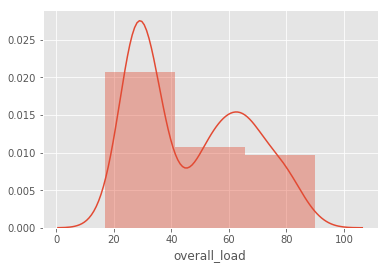

In [27]:
df['overall_load'] = df['heating_load'] + df['cooling_load']
sns.distplot(df['overall_load'], bins=3)

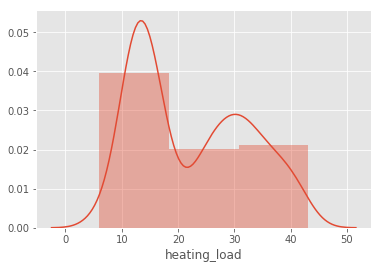

In [28]:
sns.distplot(df['heating_load'], bins=3)

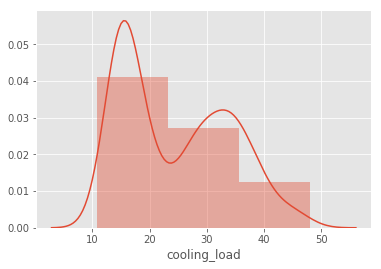

In [29]:
sns.distplot(df['cooling_load'], bins=3)

We can see from the plots that using pd.cut work completely fine as the overall load has a neat distribution. Also, the heating load and cooling load also have almost same distribution like the overall load.

In [30]:
df['load_category'] = pd.cut(df['overall_load'], 3, labels=["low_efficient", "average_efficient", "high_efficient"])

Note: Grid Search was tried but we were unable to run that. So, we have written manual for loops to find the best hyper parameters and tune them<br>
Also the runs were giving different best parameters every time they ran so we have chosen for the iteration we did. The result might differ when you run the notebook again for best parameters

Converting target to a 3D tensor and scaling the data first

In [31]:
X = new_df[feature_columns]
y = df['load_category']

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X,dummy_y, test_size=0.3, random_state=1, shuffle=True)

np.random.seed(1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Finding the best values for **epochs and batch size**

In [32]:
np.random.seed(1)
model = Sequential()
model.add(Dense(8, input_dim=16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

for epochs in [100,200,300,350]:
    for batch_size in [5,10,15,20,25]:
        seed = 1
        np.random.seed(seed)
        model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        scores_train = model.evaluate(X_train_scaled, y_train)
        scores_test = model.evaluate(X_test_scaled, y_test)

        print('\n')
        print('Batch size: ',end="")
        print(batch_size)
        print('epochs: ',end="")
        print(epochs)
        print('Training ',end="")
        print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
        print('Testing ',end="")
        print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 35us/step


Batch size: 5
epochs: 100
Training acc: 91.06%
Testing acc: 88.31%
231/231 [==============================] - 0s 41us/step


Batch size: 10
epochs: 100
Training acc: 92.92%
Testing acc: 89.18%
231/231 [==============================] - 0s 41us/step


Batch size: 15
epochs: 100
Training acc: 93.67%
Testing acc: 89.61%
231/231 [==============================] - 0s 33us/step


Batch size: 20
epochs: 100
Training acc: 93.67%
Testing acc: 89.18%
231/231 [==============================] - 0s 41us/step


Batch size: 25
epochs: 100
Training acc: 93.48%
Testing acc: 89.18%
231/231 [==============================] - 0s 39us/step


Batch size: 5
epochs: 200
Training acc: 93.30%
Testing acc: 89.18%
231/231 [==============================] - 0s 33us/step


Batch size: 10
epochs: 200
Training acc: 93.48%
Testing acc: 90.04%
231/231 [==============================] - 0s 41us/step


Batch size: 15
epochs: 200
Training acc: 94.41%
Testing acc: 9

The best number of epochs are 200 and batch size 20. These will be continued further <br>
Next, Finding the **best optimizer**

In [33]:
np.random.seed(1)
model = Sequential()
model.add(Dense(8, input_dim=16, activation='relu'))
model.add(Dense(3, activation='softmax'))

for optim in ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']:
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    seed = 1
    np.random.seed(seed)
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

    scores_train = model.evaluate(X_train_scaled, y_train)
    scores_test = model.evaluate(X_test_scaled, y_test)

    print('\n')
    print('Optimizer: ',end="")
    print(optim)
    print('Training ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
    print('Testing ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 43us/step


Optimizer: SGD
Training acc: 89.20%
Testing acc: 86.15%
231/231 [==============================] - 0s 46us/step


Optimizer: RMSprop
Training acc: 91.43%
Testing acc: 88.31%
231/231 [==============================] - 0s 35us/step


Optimizer: Adagrad
Training acc: 92.36%
Testing acc: 88.31%
231/231 [==============================] - 0s 37us/step


Optimizer: Adadelta
Training acc: 92.92%
Testing acc: 89.18%
231/231 [==============================] - 0s 43us/step


Optimizer: Adam
Training acc: 92.92%
Testing acc: 88.74%
231/231 [==============================] - 0s 35us/step


Optimizer: Adamax
Training acc: 93.48%
Testing acc: 89.18%
231/231 [==============================] - 0s 41us/step


Optimizer: Nadam
Training acc: 94.60%
Testing acc: 90.04%


The best optimizer is Nadam (Nesterov Adam optimizer). This wil be continued further<br>
Next, Finding the best value for **learning rate**

In [34]:
from keras.optimizers import Nadam

np.random.seed(1)
model = Sequential()
model.add(Dense(8, input_dim=16, activation='relu'))
model.add(Dense(3, activation='softmax'))

for learn_rate in [0.001,0.002, 0.005, 0.01, 0.1, 1, 10]:
    optim = Nadam(lr = learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    seed = 1
    np.random.seed(seed)
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

    scores_train = model.evaluate(X_train_scaled, y_train)
    scores_test = model.evaluate(X_test_scaled, y_test)

    print('\n')
    print('learn rate: ',end="")
    print(learn_rate)
    print('Training ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
    print('Testing ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 50us/step


learn rate: 0.001
Training acc: 92.74%
Testing acc: 88.74%
231/231 [==============================] - 0s 41us/step


learn rate: 0.002
Training acc: 93.67%
Testing acc: 89.18%
231/231 [==============================] - 0s 46us/step


learn rate: 0.005
Training acc: 94.04%
Testing acc: 90.04%
231/231 [==============================] - 0s 39us/step


learn rate: 0.01
Training acc: 95.72%
Testing acc: 89.18%
231/231 [==============================] - 0s 43us/step


learn rate: 0.1
Training acc: 97.39%
Testing acc: 93.07%
231/231 [==============================] - 0s 46us/step


learn rate: 1
Training acc: 74.86%
Testing acc: 71.00%
231/231 [==============================] - 0s 35us/step


learn rate: 10
Training acc: 74.86%
Testing acc: 71.00%


The best learning rate is 0.1. This will be continued further. <br>
Next, Finding the best value for **initialization mode**

In [35]:
from keras.optimizers import Nadam

for init_mode in ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']:
    
    np.random.seed(1)
    model = Sequential()
    model.add(Dense(8, input_dim=16, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    optim = Nadam(lr = 0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    seed = 1
    np.random.seed(seed)
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

    scores_train = model.evaluate(X_train_scaled, y_train)
    scores_test = model.evaluate(X_test_scaled, y_test)

    print('\n')
    print('init mode: ',end="")
    print(init_mode)
    print('Training ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
    print('Testing ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 48us/step


init mode: uniform
Training acc: 95.16%
Testing acc: 93.51%
231/231 [==============================] - 0s 45us/step


init mode: lecun_uniform
Training acc: 97.21%
Testing acc: 94.37%
231/231 [==============================] - 0s 39us/step


init mode: normal
Training acc: 91.99%
Testing acc: 88.74%
231/231 [==============================] - 0s 46us/step


init mode: zero
Training acc: 51.96%
Testing acc: 46.75%
231/231 [==============================] - 0s 39us/step


init mode: glorot_normal
Training acc: 91.62%
Testing acc: 90.04%
231/231 [==============================] - 0s 43us/step


init mode: glorot_uniform
Training acc: 96.65%
Testing acc: 94.37%
231/231 [==============================] - 0s 37us/step


init mode: he_normal
Training acc: 95.53%
Testing acc: 90.04%
231/231 [==============================] - 0s 48us/step


init mode: he_uniform
Training acc: 93.48%
Testing acc: 90.04%


The best kernel initializer for the hidden layer is from a He normal distribution. This will be continued further. <br>
Next, Finding the best value for **activation function**

In [36]:
from keras.optimizers import Nadam

for activation in ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']:
    
    np.random.seed(1)
    model = Sequential()
    model.add(Dense(8, input_dim=16, kernel_initializer='he_normal', activation=activation))
    model.add(Dense(3, activation='softmax'))
    optim = Nadam(lr = 0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    seed = 1
    np.random.seed(seed)
    model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

    scores_train = model.evaluate(X_train_scaled, y_train)
    scores_test = model.evaluate(X_test_scaled, y_test)

    print('\n')
    print('activation: ',end="")
    print(activation)
    print('Training ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
    print('Testing ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 39us/step


activation: softmax
Training acc: 95.53%
Testing acc: 91.34%
231/231 [==============================] - 0s 43us/step


activation: softplus
Training acc: 96.46%
Testing acc: 90.04%
231/231 [==============================] - 0s 39us/step


activation: softsign
Training acc: 100.00%
Testing acc: 90.91%
231/231 [==============================] - 0s 46us/step


activation: relu
Training acc: 95.90%
Testing acc: 91.34%
231/231 [==============================] - 0s 41us/step


activation: tanh
Training acc: 98.51%
Testing acc: 92.64%
231/231 [==============================] - 0s 50us/step


activation: sigmoid
Training acc: 96.28%
Testing acc: 89.18%
231/231 [==============================] - 0s 48us/step


activation: hard_sigmoid
Training acc: 99.63%
Testing acc: 91.77%
231/231 [==============================] - 0s 46us/step


activation: linear
Training acc: 90.50%
Testing acc: 89.18%


The best activation funciton is softplus. This will be continued further. <br>
Next, Finding the best values for **Drop rate in drop out regularization and weight constraint**

In [37]:
from keras.optimizers import Nadam
from keras.constraints import maxnorm

for drop in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    for weight_constraint in [1,2,3,4,5]:
    
        np.random.seed(1)
        
        model = Sequential()
        model.add(Dense(10, input_dim=16, kernel_initializer='he_normal',
                        activation='softplus',kernel_constraint=maxnorm(weight_constraint)))
        model.add(Dropout(drop))
        model.add(Dense(3, activation='softmax'))
        optim = Nadam(lr = 0.01)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

        seed = 1
        np.random.seed(seed)
        model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

        scores_train = model.evaluate(X_train_scaled, y_train)
        scores_test = model.evaluate(X_test_scaled, y_test)

        print('\n')
        print('Drop rate: ',end="")
        print(drop)
        print('Weight Constraint: ',end="")
        print(weight_constraint)
        print('Training ', end="")
        print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
        print('Testing ', end="")
        print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 50us/step


Drop rate: 0.0
Weight Constraint: 1
Training acc: 91.43%
Testing acc: 88.74%
231/231 [==============================] - 0s 52us/step


Drop rate: 0.0
Weight Constraint: 2
Training acc: 92.18%
Testing acc: 89.18%
231/231 [==============================] - 0s 50us/step


Drop rate: 0.0
Weight Constraint: 3
Training acc: 93.67%
Testing acc: 89.61%
231/231 [==============================] - 0s 44us/step


Drop rate: 0.0
Weight Constraint: 4
Training acc: 94.79%
Testing acc: 92.21%
231/231 [==============================] - 0s 48us/step


Drop rate: 0.0
Weight Constraint: 5
Training acc: 95.72%
Testing acc: 92.21%
231/231 [==============================] - 0s 45us/step


Drop rate: 0.1
Weight Constraint: 1
Training acc: 90.32%
Testing acc: 86.15%
231/231 [==============================] - 0s 43us/step


Drop rate: 0.1
Weight Constraint: 2
Training acc: 90.32%
Testing acc: 87.88%
231/231 [==============================] - 0s 50us/step

231/231 [==============================] - 0s 59us/step


Drop rate: 0.8
Weight Constraint: 4
Training acc: 85.66%
Testing acc: 82.25%
231/231 [==============================] - 0s 59us/step


Drop rate: 0.8
Weight Constraint: 5
Training acc: 87.90%
Testing acc: 83.12%
231/231 [==============================] - 0s 57us/step


Drop rate: 0.9
Weight Constraint: 1
Training acc: 58.10%
Testing acc: 51.95%
231/231 [==============================] - 0s 54us/step


Drop rate: 0.9
Weight Constraint: 2
Training acc: 75.79%
Testing acc: 71.43%
231/231 [==============================] - 0s 63us/step


Drop rate: 0.9
Weight Constraint: 3
Training acc: 75.79%
Testing acc: 71.43%
231/231 [==============================] - 0s 67us/step


Drop rate: 0.9
Weight Constraint: 4
Training acc: 80.26%
Testing acc: 75.32%
231/231 [==============================] - 0s 59us/step


Drop rate: 0.9
Weight Constraint: 5
Training acc: 81.75%
Testing acc: 79.22%


The best Dropout rate is 0.3 and best weight constraint is 3. But, it is reducing both train and test accuracy. So, this will not be continued further <br>
Next, Finding the best value for **number of neurons in the hidden layer**

In [38]:
from keras.optimizers import Nadam

for neurons in [1, 5, 7, 8, 10, 12]:
    
    seed = 1
    np.random.seed(seed)
    
    model = Sequential()
    model.add(Dense(neurons, input_dim=16, kernel_initializer='he_normal', activation='softplus'))
    model.add(Dense(3, activation='softmax'))
    optim = Nadam(lr = 0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

    model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

    scores_train = model.evaluate(X_train_scaled, y_train)
    scores_test = model.evaluate(X_test_scaled, y_test)

    print('\n')
    print('Number of neurons: ',end="")
    print(neurons)
    print('Training ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
    print('Testing ', end="")
    print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

231/231 [==============================] - 0s 56us/step


Number of neurons: 1
Training acc: 91.62%
Testing acc: 87.45%
231/231 [==============================] - 0s 59us/step


Number of neurons: 5
Training acc: 96.46%
Testing acc: 92.21%
231/231 [==============================] - 0s 50us/step


Number of neurons: 7
Training acc: 97.77%
Testing acc: 92.64%
231/231 [==============================] - 0s 59us/step


Number of neurons: 8
Training acc: 98.14%
Testing acc: 93.07%
231/231 [==============================] - 0s 56us/step


Number of neurons: 10
Training acc: 96.65%
Testing acc: 93.07%
231/231 [==============================] - 0s 52us/step


Number of neurons: 12
Training acc: 97.39%
Testing acc: 92.21%


We can see with **5 neurons** we can get the best train and test accuracy ~ 95%<br>
Now let us use the best model

In [39]:
from keras.optimizers import Nadam

seed = 1
np.random.seed(seed)

model = Sequential()
model.add(Dense(5, input_dim=16, kernel_initializer='he_normal', activation='softplus'))
model.add(Dense(3, activation='softmax'))
optim = Nadam(lr = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=200, batch_size=20, verbose=0)

scores_train = model.evaluate(X_train_scaled, y_train)
scores_test = model.evaluate(X_test_scaled, y_test)

print('\n')
print('Number of neurons: ',end="")
print(neurons)
print('Training ', end="")
print("%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))
print('Testing ', end="")
print("%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

model.summary()

231/231 [==============================] - 0s 61us/step


Number of neurons: 12
Training acc: 96.46%
Testing acc: 94.37%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_151 (Dense)            (None, 5)                 85        
_________________________________________________________________
dense_152 (Dense)            (None, 3)                 18        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


The model summary is shown above and this will be used for classification of the overall load. <br>
Overall we can see that in most of the models the training accuracy is higher than the test accuracy and even if we vary the parameters the train and test accuracy both are decreasing. This means we need **more data** for the variance problem.